# Team ID:PNT2022TMID30209

#### Title: Assignment 4
## Author: Sivatharani V


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 2. Loading the dataset

In [5]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Mall_Customers.csv")

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Visualizations

# 3. i) Univariate Analysis

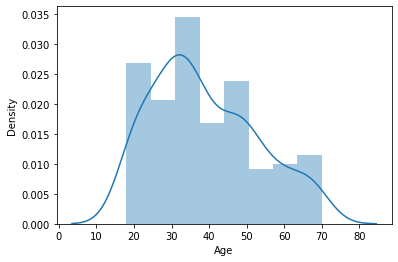

In [8]:
sns.distplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


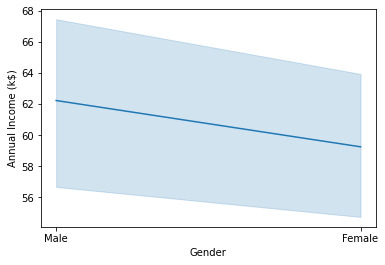

In [9]:
sns.lineplot(data['Gender'], data['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


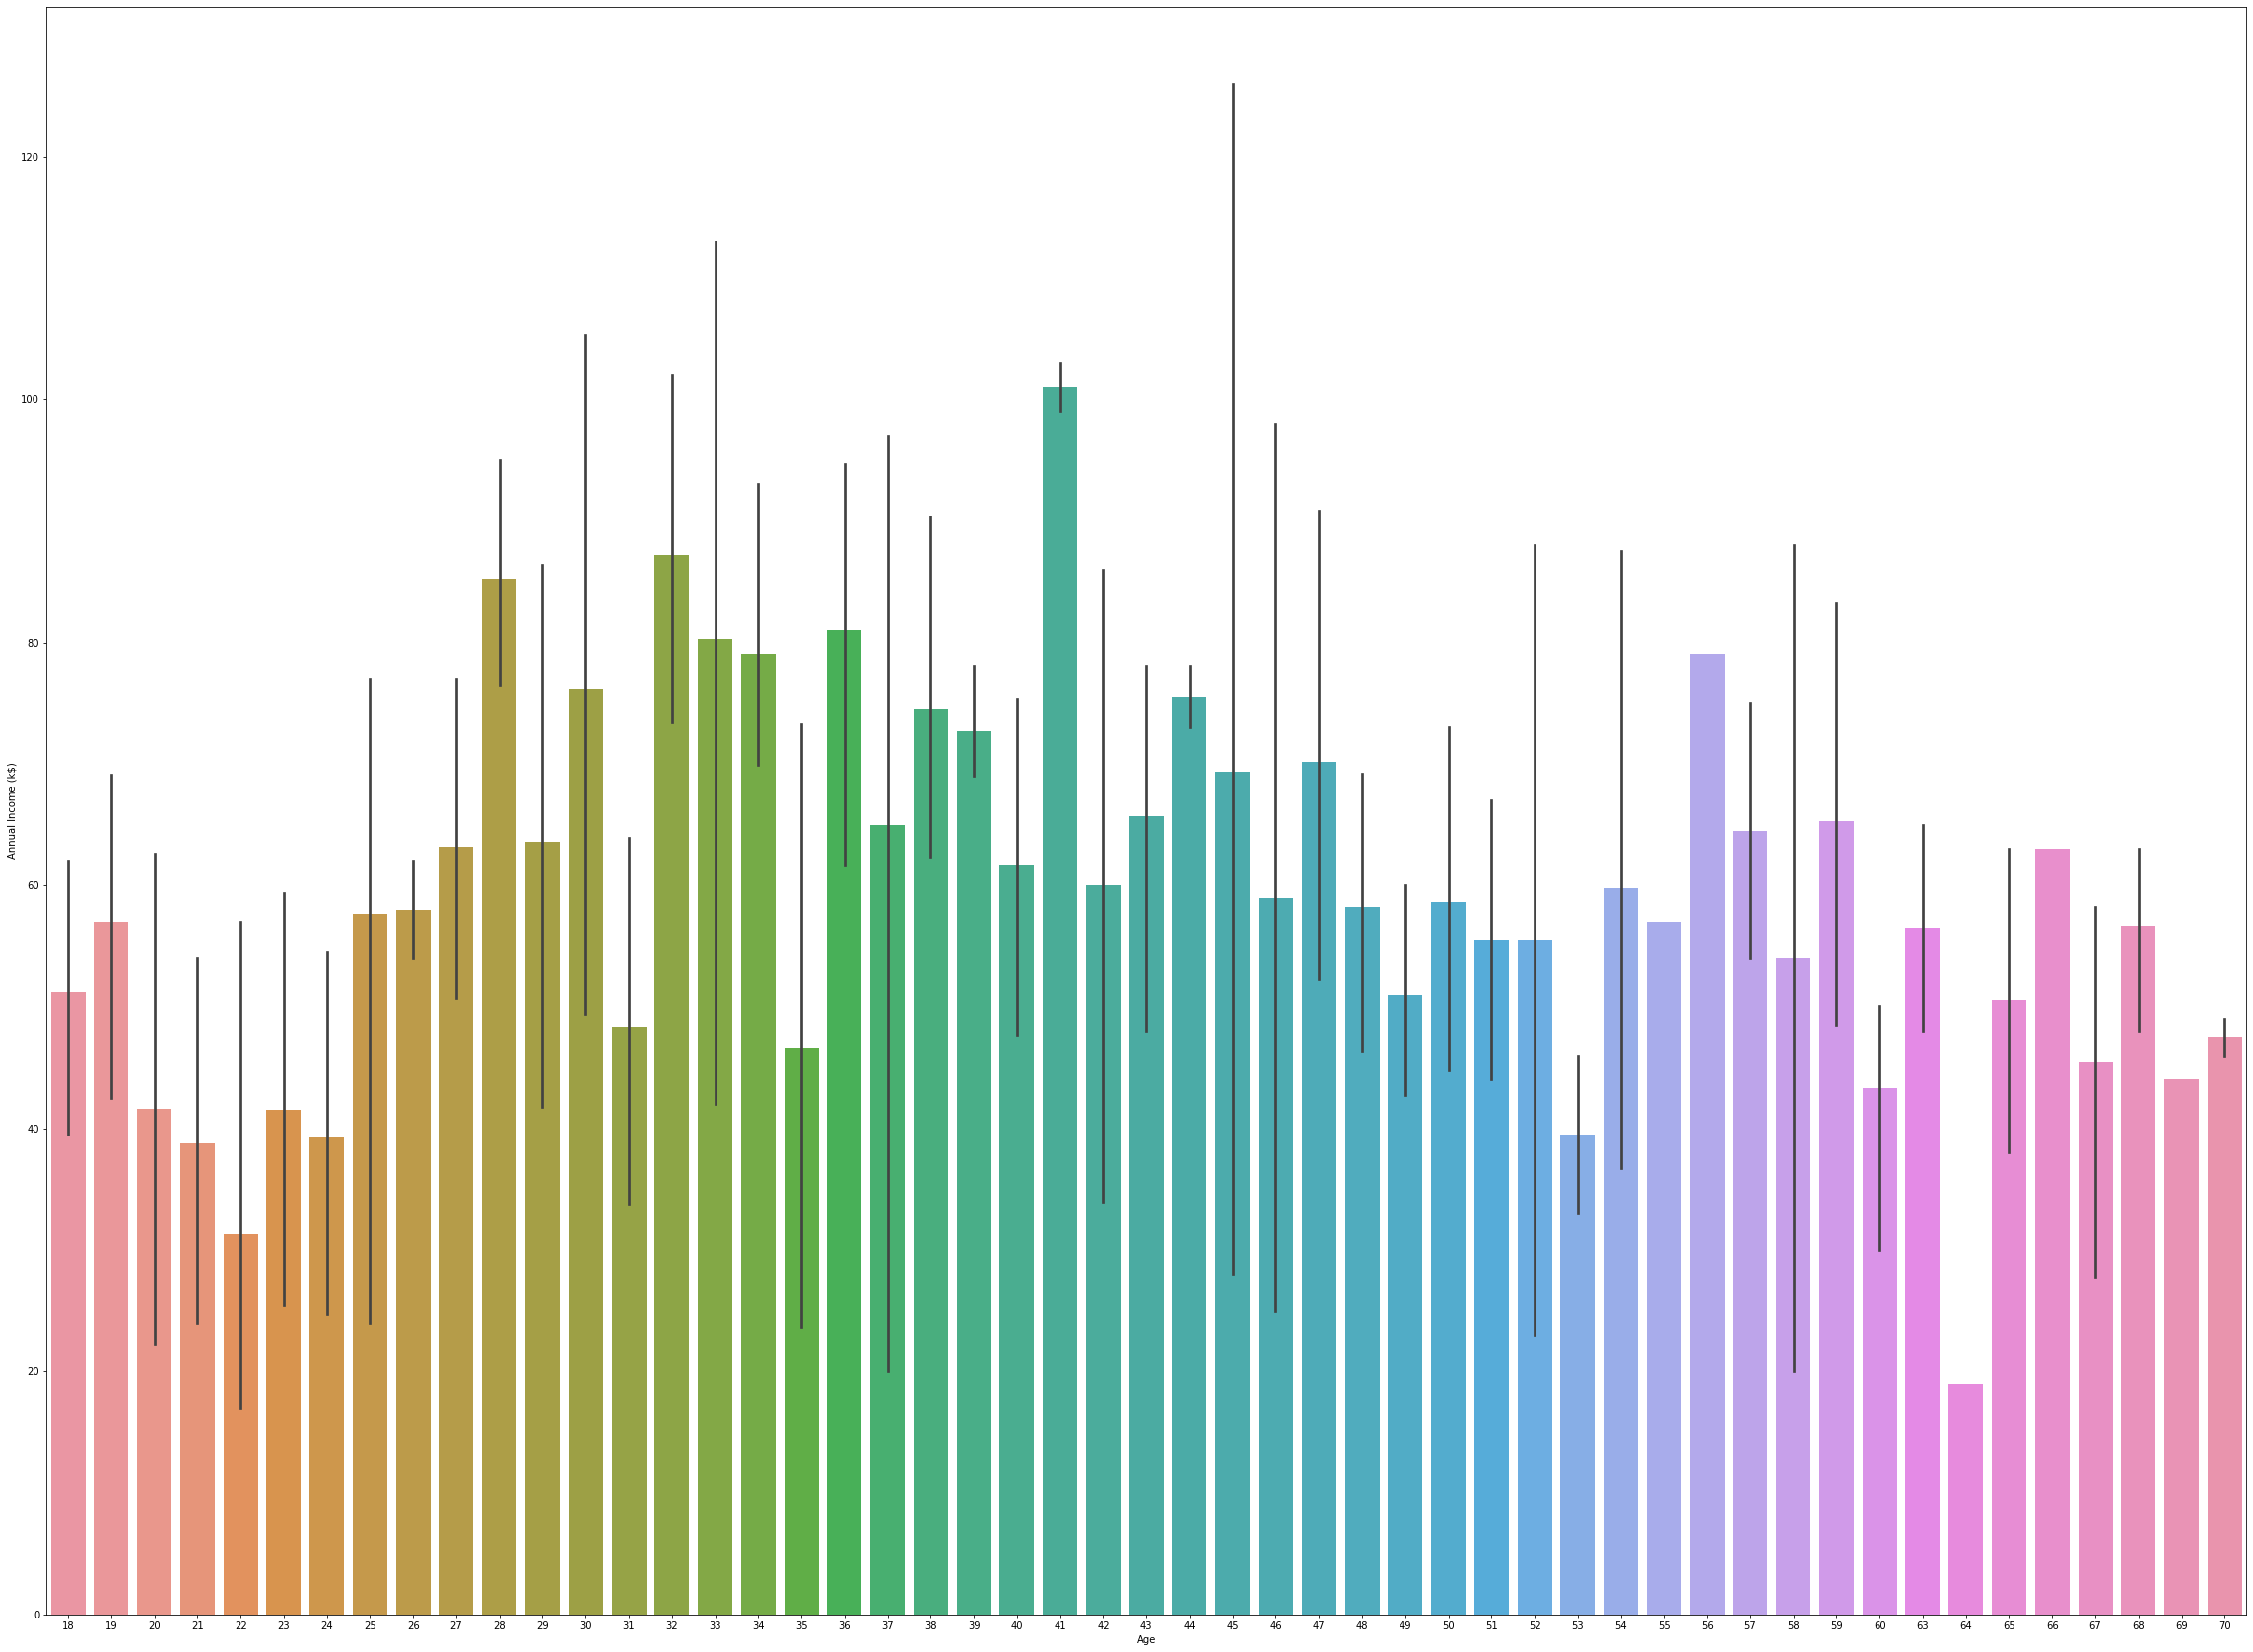

In [10]:
plt.figure(figsize=(40,30))
sns.barplot(data['Age'], data['Annual Income (k$)'])

# 3. iii) Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


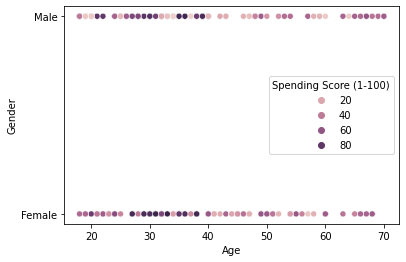

In [11]:
sns.scatterplot(data['Age'], data['Gender'], hue = data['Spending Score (1-100)'])

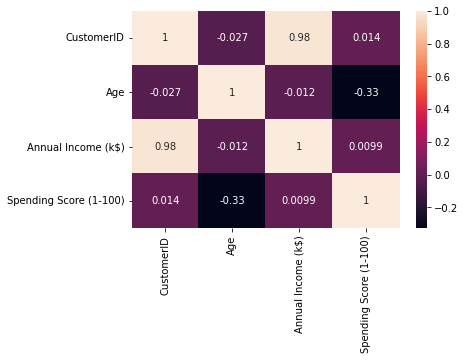

In [12]:
sns.heatmap(data.corr(), annot = True)

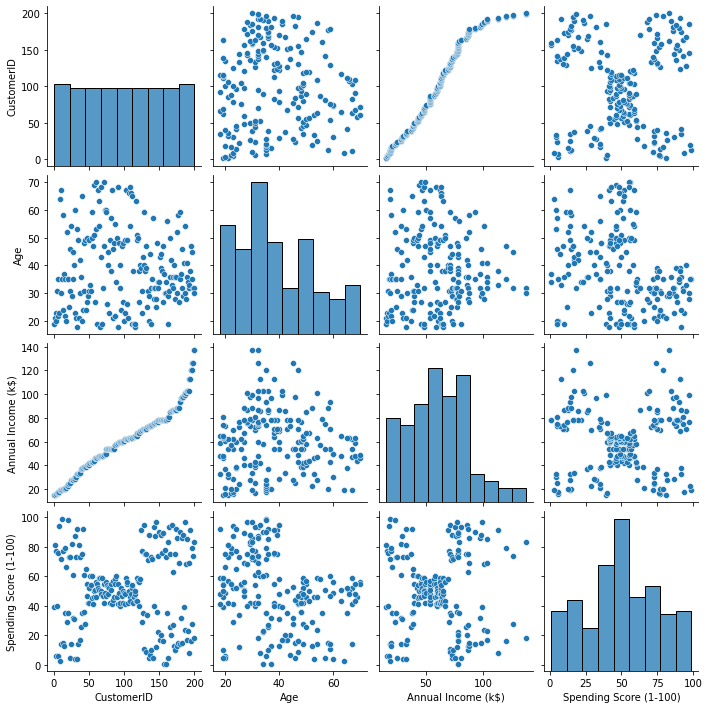

In [13]:
sns.pairplot(data)

# 4. Descriptive Statistics

## Central Tendency

In [39]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [40]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [41]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


##  Dispersion of Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


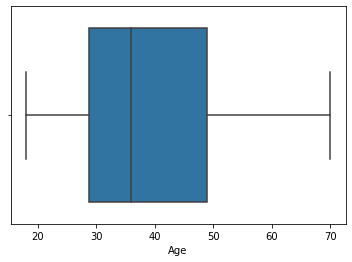

In [42]:
sns.boxplot(data['Age'])

### Interquartile Range

In [43]:
q = data.quantile([0.75, 0.25])

In [44]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [45]:
iqr = q.iloc[0] - q.iloc[1]

In [46]:
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [47]:
u = q.iloc[0] + 1.5*iqr 
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [48]:
l = q.iloc[1] - 1.5*iqr
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

### Variance

In [49]:
data.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

### Standard Deviation

In [50]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

# 5. Checking and Dealing with missing values

In [51]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Outliers and Replacing them

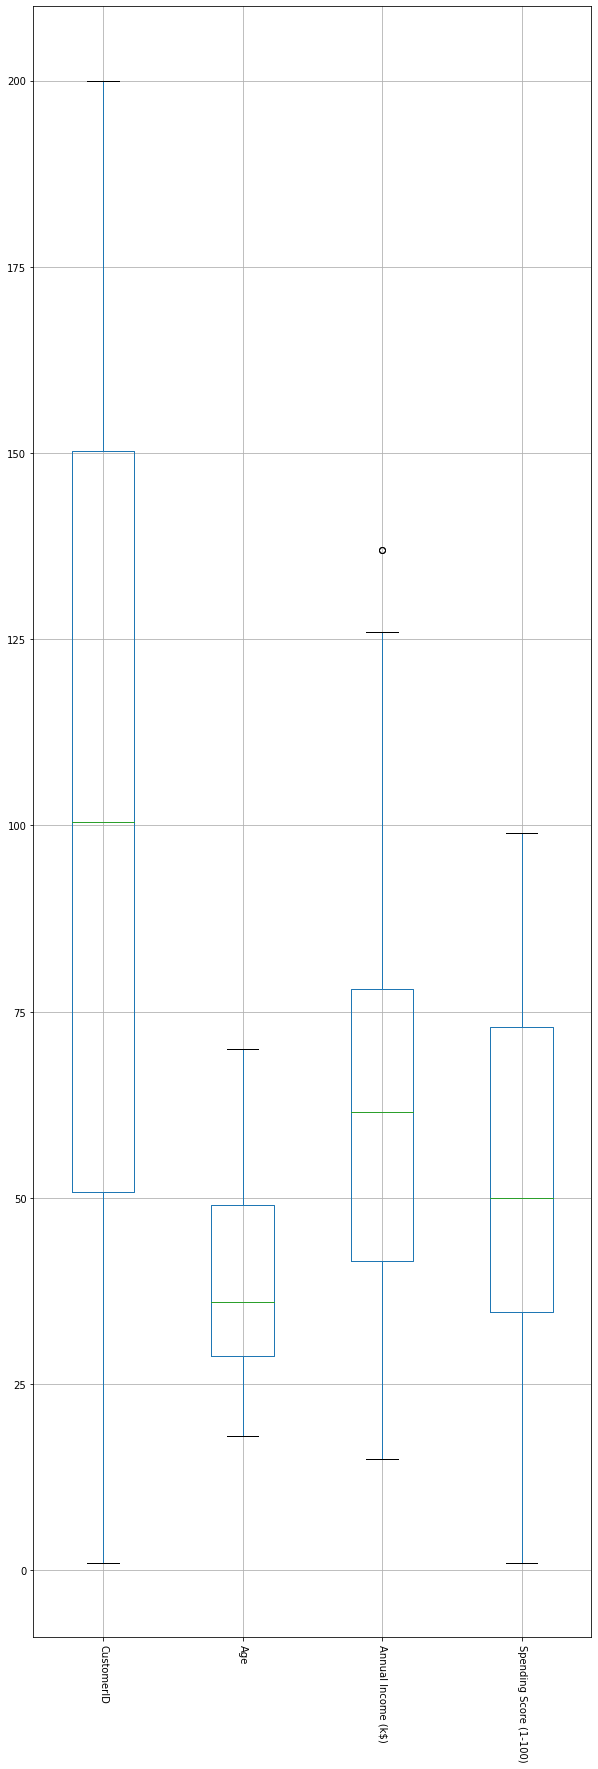

In [52]:
plt.figure(figsize=(10,30))
data.boxplot(rot = 270)

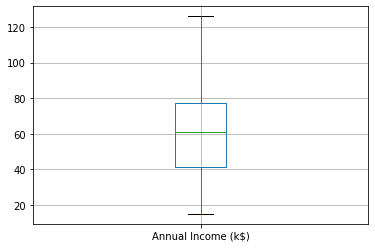

In [53]:
data['Annual Income (k$)'] = np.where(data['Annual Income (k$)'] > 130, 60.56, data['Annual Income (k$)'])
data.boxplot('Annual Income (k$)')

# 7. Encoding for Categorical values

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Age']=le.fit_transform(data['Age'])

In [57]:
data['Age']

0       1
1       3
2       2
3       5
4      13
       ..
195    17
196    27
197    14
198    14
199    12
Name: Age, Length: 200, dtype: int64

# 8. Scaling the independant variables

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_scaled = mms.fit_transform(data)

In [59]:
x_scaled

array([[0.        , 1.        , 0.02      , 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.06      , 0.        , 0.81632653],
       [0.01005025, 0.        , 0.04      , 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.1       , 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.26      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.08      , 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.34      , 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.1       , 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88      , 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.24      , 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94      , 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.34      , 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.8       , 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.12      , 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

# 9. Performing Clustering

In [60]:
from sklearn.cluster import KMeans
km=KMeans()
cluster = km.fit_predict(x_scaled)

In [61]:
values = data.columns
values

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# 10. Adding the Cluster Data to the primary Dataset

In [62]:
df = pd.DataFrame(x_scaled, columns = values)
df['Cluster_Value'] = pd.Series(cluster)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Value
0,0.000000,1.0,0.02,0.000000,0.387755,6
1,0.005025,1.0,0.06,0.000000,0.816327,6
2,0.010050,0.0,0.04,0.009009,0.051020,1
3,0.015075,0.0,0.10,0.009009,0.775510,1
4,0.020101,0.0,0.26,0.018018,0.397959,1
...,...,...,...,...,...,...
195,0.979899,0.0,0.34,0.945946,0.795918,7
196,0.984925,0.0,0.54,1.000000,0.275510,3
197,0.989950,1.0,0.28,1.000000,0.744898,5
198,0.994975,1.0,0.28,0.410450,0.173469,2


# 11. Splitting into X and Y

In [63]:
x = df.iloc[:,1:5]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.02,0.000000,0.387755
1,1.0,0.06,0.000000,0.816327
2,0.0,0.04,0.009009,0.051020
3,0.0,0.10,0.009009,0.775510
4,0.0,0.26,0.018018,0.397959
...,...,...,...,...
195,0.0,0.34,0.945946,0.795918
196,0.0,0.54,1.000000,0.275510
197,1.0,0.28,1.000000,0.744898
198,1.0,0.28,0.410450,0.173469


In [64]:
y = df['Cluster_Value']
y

0      6
1      6
2      1
3      1
4      1
      ..
195    7
196    3
197    5
198    2
199    5
Name: Cluster_Value, Length: 200, dtype: int32

# 12. Splitting into training and testing

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 1) 

In [66]:
x_train

array([[0.58291457, 0.        , 0.86      , 0.45045045, 0.42857143],
       [0.33668342, 0.        , 0.96      , 0.2972973 , 0.47959184],
       [0.3919598 , 0.        , 0.1       , 0.35135135, 0.52040816],
       [0.21105528, 1.        , 0.6       , 0.21621622, 0.35714286],
       [0.08542714, 1.        , 0.04      , 0.05405405, 0.66326531],
       [0.02512563, 0.        , 0.08      , 0.01801802, 0.76530612],
       [0.63819095, 1.        , 0.44      , 0.5045045 , 0.95918367],
       [0.52763819, 0.        , 0.06      , 0.42342342, 0.41836735],
       [0.24120603, 0.        , 0.22      , 0.22522523, 0.41836735],
       [0.33165829, 0.        , 0.5       , 0.2972973 , 0.5       ],
       [0.27135678, 0.        , 0.64      , 0.25225225, 0.44897959],
       [0.42211055, 0.        , 0.06      , 0.35135135, 0.57142857],
       [0.91959799, 0.        , 0.22      , 0.74774775, 0.8877551 ],
       [0.79396985, 1.        , 0.32      , 0.56756757, 0.        ],
       [0.83417085, 1.        , 0.

In [67]:
x_test

array([[0.29145729, 0.        , 0.18      , 0.27927928, 0.51020408],
       [0.20100503, 0.        , 0.9       , 0.20720721, 0.34693878],
       [0.17085427, 0.        , 0.62      , 0.16216216, 0.13265306],
       [0.51256281, 1.        , 0.94      , 0.42342342, 0.59183673],
       [0.92462312, 0.        , 0.46      , 0.75675676, 0.3877551 ],
       [0.99497487, 1.        , 0.28      , 0.41045045, 0.17346939],
       [0.47738693, 1.        , 0.12      , 0.40540541, 0.52040816],
       [0.0201005 , 0.        , 0.26      , 0.01801802, 0.39795918],
       [0.14572864, 0.        , 0.1       , 0.12612613, 0.87755102],
       [0.84422111, 0.        , 0.36      , 0.64864865, 0.26530612],
       [0.85929648, 1.        , 0.2       , 0.64864865, 0.75510204],
       [0.09045226, 1.        , 0.68      , 0.07207207, 0.28571429],
       [0.05527638, 0.        , 0.34      , 0.03603604, 1.        ],
       [0.44723618, 0.        , 0.64      , 0.38738739, 0.45918367],
       [0.55276382, 1.        , 0.

In [68]:
y_train

116    4
67     4
78     1
42     0
17     6
      ..
133    7
137    5
72     4
140    3
37     1
Name: Cluster_Value, Length: 140, dtype: int32

In [69]:
y_test

58     1
40     4
34     4
102    0
184    3
198    2
95     6
4      1
29     1
168    3
171    5
18     0
11     1
89     4
110    0
118    4
159    7
35     1
136    3
59     0
51     6
16     1
44     4
94     1
31     1
162    2
38     1
28     4
193    7
27     6
47     1
165    7
194    3
177    5
176    2
97     1
174    3
73     4
69     1
172    2
108    0
107    0
189    7
14     6
56     4
19     1
114    1
39     1
185    5
124    3
98     0
123    5
119    4
53     0
33     6
179    5
181    7
106    4
199    5
138    2
Name: Cluster_Value, dtype: int32

# 13. Building the model

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# 14. Training the model

In [72]:
lr.fit(x_train, y_train)

LinearRegression()

# 15. Testing the model

In [73]:
pred_test=lr.predict(x_test)
pred_test

array([3.42742771, 1.54173582, 1.19111474, 2.92004745, 3.89263181,
       4.90681272, 3.79210805, 2.53474648, 4.78920293, 3.60624908,
       5.54462502, 1.40218682, 4.77772557, 2.90565764, 2.88507282,
       3.18756572, 5.64059135, 4.63141515, 2.2746146 , 2.25191591,
       3.3337219 , 2.38843667, 1.76830408, 3.35842759, 4.33059714,
       3.12681468, 2.00453059, 2.10451672, 5.69714184, 3.19571065,
       3.20651869, 5.43589155, 2.32742637, 5.46540487, 2.43068473,
       3.8945899 , 2.70331853, 2.85797337, 3.33556511, 2.84206506,
       2.39761447, 2.85185866, 5.78811456, 1.25249505, 2.67874876,
       4.8021637 , 4.35267545, 4.39115329, 6.2526738 , 3.55234805,
       2.7203669 , 5.22711915, 3.77923434, 2.55733378, 4.87299028,
       5.89478697, 5.95821854, 2.89245067, 7.47860124, 2.94823861])

# 16. Evaluation Metrics

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred_test, y_test)
mse

4.6880622442285835

In [75]:
rmse = np.sqrt(mse)
rmse

2.165193350310448

In [76]:
r2= r2_score(pred_test, y_test)
r2

-1.388068611920107